<a href="https://colab.research.google.com/github/amiralitalebi/CW_MN3B/blob/main/ann_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/coursework_project")
print("Current working directory:", os.getcwd())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current working directory: /content/drive/MyDrive/coursework_project


In [ ]:
import numpy as np
import json
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
with open("datasets/processed_part1/label_map.json") as f:
    raw_map = json.load(f)
label_map = {int(k): v for k, v in raw_map.items()}

X_train = np.load("datasets/processed_part1/X_train.npy")
y_train = np.load("datasets/processed_part1/y_train.npy")

X_val   = np.load("datasets/processed_part1/X_val.npy")
y_val   = np.load("datasets/processed_part1/y_val.npy")

X_test  = np.load("datasets/processed_part1/X_test.npy")
y_test  = np.load("datasets/processed_part1/y_test.npy")

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)


Train: (2308, 100, 100, 3) Val: (578, 100, 100, 3) Test: (39767, 100, 100, 3)
Number of classes: 6


In [ ]:
X_val = X_val[:3000]
y_val = y_val[:3000]

X_test = X_test[:5000]
y_test = y_test[:5000]

print("Reduced Val:", X_val.shape, "Reduced Test:", X_test.shape)


Reduced Val: (578, 100, 100, 3) Reduced Test: (5000, 100, 100, 3)


In [ ]:
X_train = X_train.astype("float32")
X_val   = X_val.astype("float32")
X_test  = X_test.astype("float32")

X_train /= 255.0
X_val   /= 255.0
X_test  /= 255.0


In [ ]:
ann_model = keras.Sequential([
    layers.Flatten(input_shape=(100, 100, 3)),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

ann_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

ann_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     7,680,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,713,926 (29.43 MB)

 Trainable params: 7,713,926 (29.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ann_history = ann_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.3427 - loss: 1.5911 - val_accuracy: 0.6834 - val_loss: 0.8550
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.7452 - loss: 0.7760 - val_accuracy: 0.9585 - val_loss: 0.3253
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.9067 - loss: 0.3465 - val_accuracy: 0.9671 - val_loss: 0.1567
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.9505 - loss: 0.1938 - val_accuracy: 0.9965 - val_loss: 0.0793
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - accuracy: 0.9689 - loss: 0.1159 - val_accuracy: 0.9965 - val_loss: 0.0560
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.9859 - loss: 0.0751 - val_accuracy: 0.9792 - val_loss: 0.0566
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9868 - loss: 0.0623 - val_accuracy: 0.9965 - val_loss: 0.0216
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.9912 - loss: 0.0416 - val_accuracy: 0.

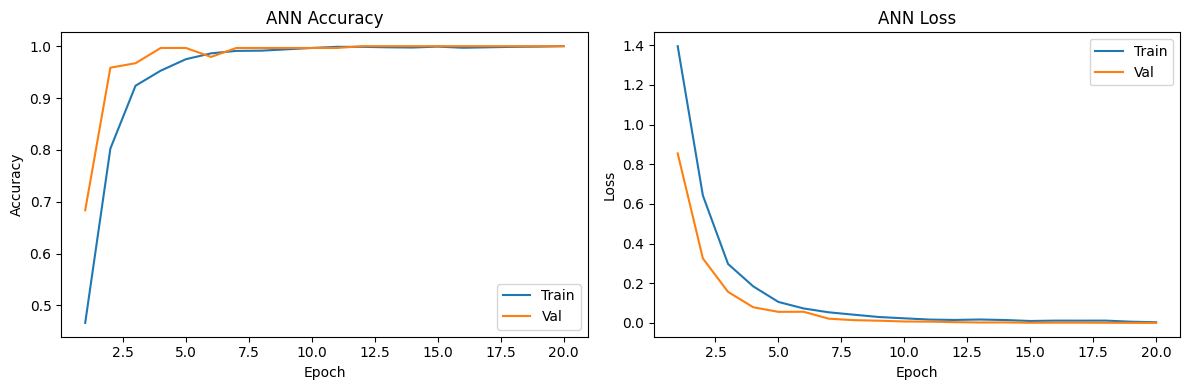

In [ ]:
def plot_history(history, title_prefix=""):
    hist = history.history
    epochs = range(1, len(hist["accuracy"]) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, hist["accuracy"], label="Train")
    plt.plot(epochs, hist["val_accuracy"], label="Val")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{title_prefix} Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, hist["loss"], label="Train")
    plt.plot(epochs, hist["val_loss"], label="Val")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{title_prefix} Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(ann_history, "ANN")


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step
ANN Classification Report:

              precision    recall  f1-score   support

           0       0.10      1.00      0.19       231
           1       0.25      1.00      0.41       142
           2       0.43      1.00      0.61       154
           3       0.46      1.00      0.63       235
           4       0.19      1.00      0.33       154
           5       0.33      0.96      0.50       201
           6       0.00      0.00      0.00       160
           7       0.00      0.00      0.00       241
           8       0.00      0.00      0.00       146
           9       0.00      0.00      0.00       157
          10       0.00      0.00      0.00       229
          11       0.00      0.00      0.00       228
          12       0.00      0.00      0.00       231
          13       0.00      0.00      0.00       164
          14       0.00      0.00      0.00       156
          15       0.00      0.00      0.00       148
          16 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 800x800 with 0 Axes>

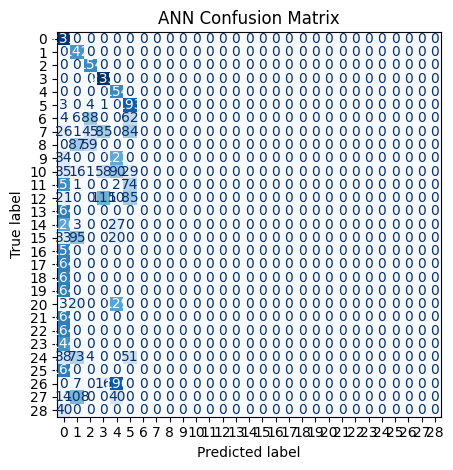

In [ ]:
ann_test_probs = ann_model.predict(X_test, batch_size=64)
ann_y_pred = np.argmax(ann_test_probs, axis=1)

print("ANN Classification Report:\n")
print(classification_report(y_test, ann_y_pred))

cm_ann = confusion_matrix(y_test, ann_y_pred)

plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ann)
disp.plot(cmap="Blues", colorbar=False)
plt.title("ANN Confusion Matrix")
plt.tight_layout()
plt.show()
